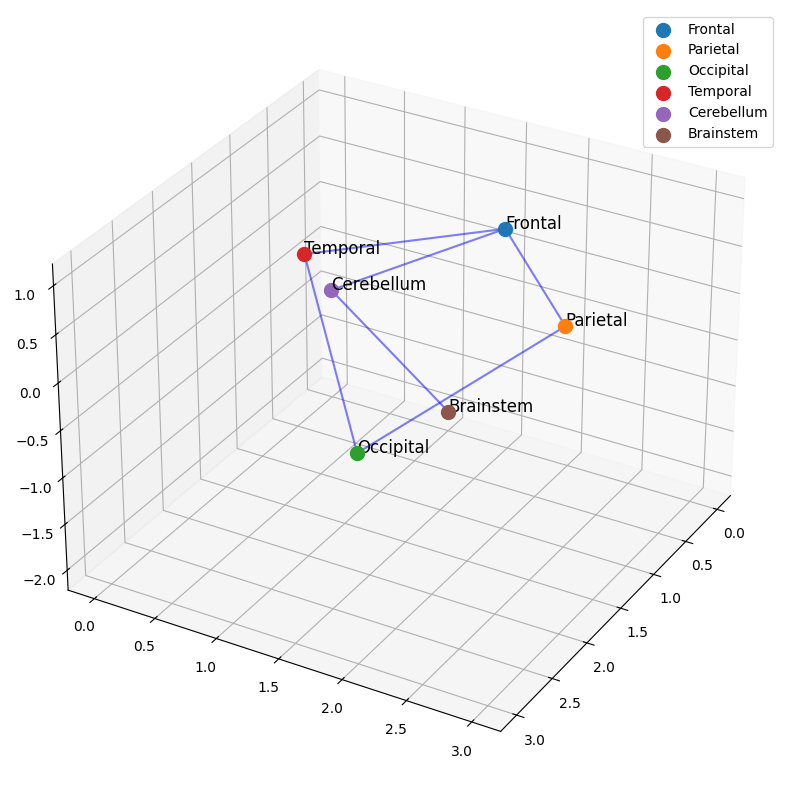

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define a simple brain regions graph
regions = ["Frontal", "Parietal", "Occipital", "Temporal", "Cerebellum", "Brainstem"]
connections = [
    ("Frontal", "Parietal"),
    ("Frontal", "Temporal"),
    ("Temporal", "Occipital"),
    ("Occipital", "Parietal"),
    ("Cerebellum", "Brainstem"),
    ("Frontal", "Cerebellum")
]

# Create a network graph
G = nx.Graph()
G.add_nodes_from(regions)
G.add_edges_from(connections)

# Define 3D positions for each region (for illustrative purposes)
# Normally, we could use actual 3D coordinates, but let's make a simple layout.
positions = {
    "Frontal": (1, 2, 1),
    "Parietal": (2, 3, 1),
    "Occipital": (3, 2, 0),
    "Temporal": (2, 1, 1),
    "Cerebellum": (0, 0, -1),
    "Brainstem": (0, 1, -2)
}

# Set up a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Draw the network in 3D space
edges = G.edges()
for edge in edges:
    x_vals = np.array([positions[edge[0]][0], positions[edge[1]][0]])
    y_vals = np.array([positions[edge[0]][1], positions[edge[1]][1]])
    z_vals = np.array([positions[edge[0]][2], positions[edge[1]][2]])
    ax.plot(x_vals, y_vals, z_vals, color='b', alpha=0.5)

# Plot the nodes (brain regions)
for region in regions:
    ax.scatter(*positions[region], s=100, label=region)

# Annotate nodes with the region names
for region, pos in positions.items():
    ax.text(pos[0], pos[1], pos[2], region, fontsize=12)

# Adjust the view angle
ax.view_init(elev=30, azim=30)

# Display the plot
plt.legend()
plt.show()


/home/linux-pc/anaconda3/envs/torch/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


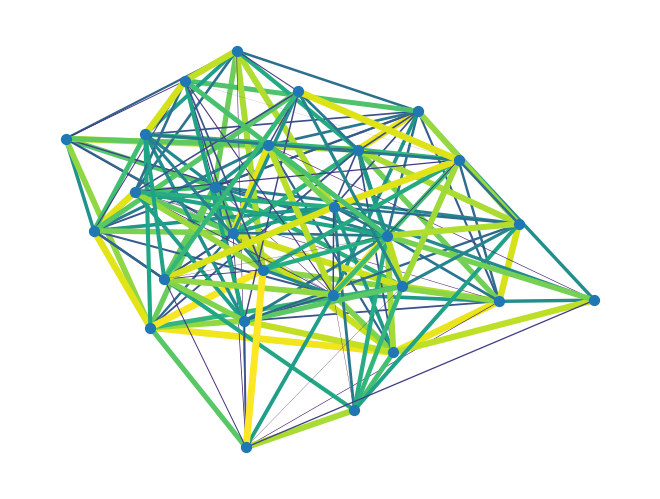

In [3]:
import networkx as nx, matplotlib.pyplot as plt, numpy as np

regions = ["Frontal", "Parietal", "Occipital"]
individuals = ["Ind1", "Ind2", "Ind3"]
classes = ["ClassA", "ClassB", "ClassC"]

G = nx.Graph()
for ind in individuals:
    for cls in classes:
        for region in regions:
            G.add_node(f"{ind}_{cls}_{region}", group=cls)

np.random.seed(42)
for n1 in G.nodes:
    for n2 in G.nodes:
        if n1 != n2 and np.random.rand() > 0.7:
            G.add_edge(n1, n2, weight=np.random.rand())

pos = nx.spring_layout(G, seed=42)
weights = [G[u][v]['weight']*5 for u, v in G.edges]
nx.draw(G, pos, with_labels=False, node_size=50, edge_color=weights, width=weights, cmap=plt.cm.Blues)
plt.show()

## Python networkx Brain Region Graph

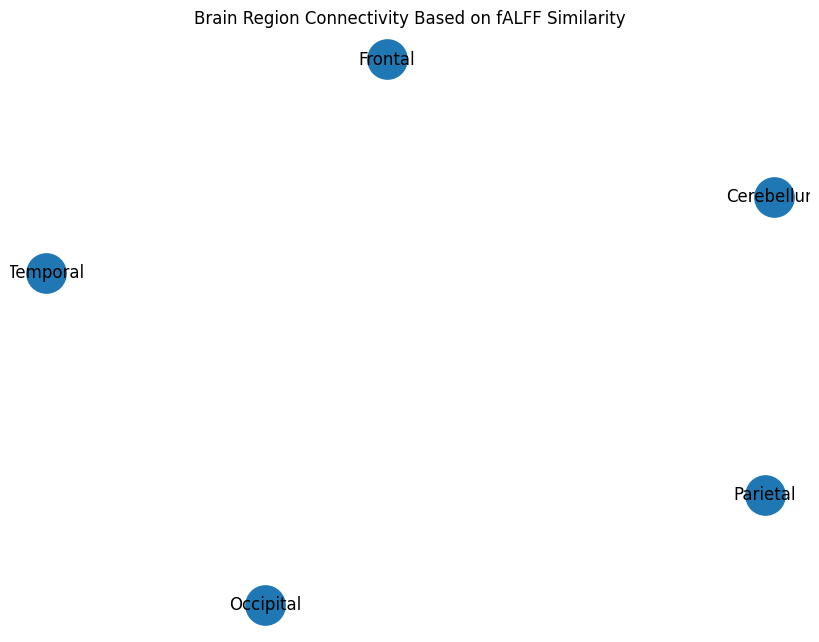

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# Example fALFF data for 3 individuals across 3 classes in 5 brain regions
regions = ["Frontal", "Parietal", "Occipital", "Temporal", "Cerebellum"]
falff_data = np.random.rand(5, 9)  # (5 regions, 9 samples: 3 individuals × 3 classes)

# Compute similarity (using correlation distance)
similarity_matrix = 1 - squareform(pdist(falff_data, metric="correlation"))

# Create weighted graph
G = nx.Graph()
for i, region in enumerate(regions):
    G.add_node(region)

for i in range(len(regions)):
    for j in range(i + 1, len(regions)):  # Avoid self-loops & duplicate edges
        weight = similarity_matrix[i, j]
        if weight > 0.5:  # Filter weak connections
            G.add_edge(regions[i], regions[j], weight=weight)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [d['weight'] * 5 for (u, v, d) in edges]  # Scale edge thickness

nx.draw(G, pos, with_labels=True, node_size=800, font_size=12, edge_color=weights, 
        width=weights, edge_cmap=plt.cm.Blues)

plt.title("Brain Region Connectivity Based on fALFF Similarity")
plt.show()
